In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
smartphone_df = pd.read_csv('smartphones.csv')
smartphone_df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


In [3]:
new_smartphone_df = smartphone_df[['price', 'has_5g', 'has_nfc', 'num_cores', 'processor_speed',
                                   'battery_capacity', 'fast_charging_available', 'ram_capacity', 'internal_memory', 'screen_size',
                                   'refresh_rate', 'num_rear_cameras', 'os']]
new_smartphone_df.head()

,price,has_5g,has_nfc,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,os
0,54999,True,True,8.0,3.2,5000.0,1,12.0,256.0,6.70,120,3,android
1,19989,True,False,8.0,2.2,5000.0,1,6.0,128.0,6.59,120,3,android
2,16499,True,False,8.0,2.4,5000.0,1,4.0,64.0,6.60,90,3,android
3,14999,True,False,8.0,2.2,5000.0,1,6.0,128.0,6.55,120,3,android
4,24999,True,False,8.0,2.6,5000.0,1,6.0,128.0,6.70,120,3,android


In [4]:
new_smartphone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    980 non-null    int64  
 1   has_5g                   980 non-null    bool   
 2   has_nfc                  980 non-null    bool   
 3   num_cores                974 non-null    float64
 4   processor_speed          938 non-null    float64
 5   battery_capacity         969 non-null    float64
 6   fast_charging_available  980 non-null    int64  
 7   ram_capacity             980 non-null    float64
 8   internal_memory          980 non-null    float64
 9   screen_size              980 non-null    float64
 10  refresh_rate             980 non-null    int64  
 11  num_rear_cameras         980 non-null    int64  
 12  os                       966 non-null    object 
dtypes: bool(2), float64(6), int64(4), object(1)
memory usage: 86.3+ KB


In [5]:
#Dropping null values from dataframe
new_smartphone_df = new_smartphone_df.dropna()
new_smartphone_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 914 entries, 0 to 978
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    914 non-null    int64  
 1   has_5g                   914 non-null    bool   
 2   has_nfc                  914 non-null    bool   
 3   num_cores                914 non-null    float64
 4   processor_speed          914 non-null    float64
 5   battery_capacity         914 non-null    float64
 6   fast_charging_available  914 non-null    int64  
 7   ram_capacity             914 non-null    float64
 8   internal_memory          914 non-null    float64
 9   screen_size              914 non-null    float64
 10  refresh_rate             914 non-null    int64  
 11  num_rear_cameras         914 non-null    int64  
 12  os                       914 non-null    object 
dtypes: bool(2), float64(6), int64(4), object(1)
memory usage: 87.5+ KB


Text(0.5, 0, 'price')

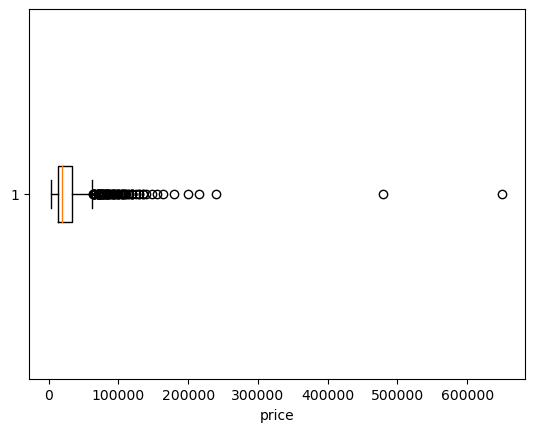

In [6]:
#Finding outliers in the price feature
plt.boxplot(new_smartphone_df['price'], vert=False)
plt.xlabel('price')

In [7]:
print(new_smartphone_df['price'].nlargest(5))

427    650000
887    480000
478    239999
951    214990
458    199990
Name: price, dtype: int64


In [8]:
#Dropping outliers
new_smartphone_df = new_smartphone_df.drop([427, 887], axis=0)
print(new_smartphone_df['price'].nlargest(5))

478    239999
951    214990
458    199990
756    179900
905    163980
Name: price, dtype: int64


Text(0.5, 0, 'Battery Capacity')

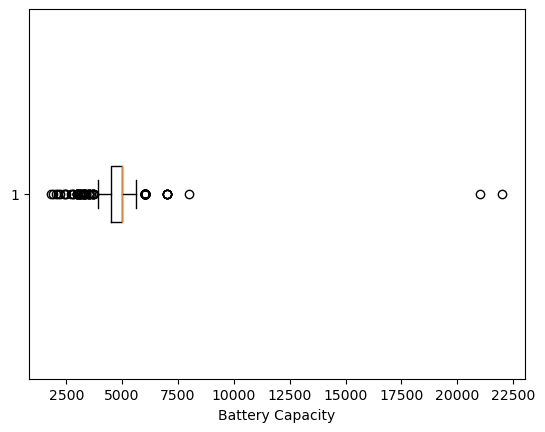

In [9]:
#Finding outliers in the battery_capacity feature of the dataset
plt.boxplot(new_smartphone_df['battery_capacity'], vert=False)
plt.xlabel('Battery Capacity')

In [10]:
print(new_smartphone_df['battery_capacity'].nlargest(5))

843    22000.0
391    21000.0
966     8000.0
216     7000.0
276     7000.0
Name: battery_capacity, dtype: float64


In [11]:
#Dropping outliers
new_smartphone_df = new_smartphone_df.drop([843, 391], axis=0)
print(new_smartphone_df['battery_capacity'].nlargest(5))

966    8000.0
216    7000.0
276    7000.0
479    7000.0
822    7000.0
Name: battery_capacity, dtype: float64


In [12]:
#One hot encoding the os column
new_smartphone_df = pd.get_dummies(new_smartphone_df, columns=['os'])
new_smartphone_df.head()

,price,has_5g,has_nfc,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,os_android,os_ios,os_other
0,54999,True,True,8.0,3.2,5000.0,1,12.0,256.0,6.70,120,3,True,False,False
1,19989,True,False,8.0,2.2,5000.0,1,6.0,128.0,6.59,120,3,True,False,False
2,16499,True,False,8.0,2.4,5000.0,1,4.0,64.0,6.60,90,3,True,False,False
3,14999,True,False,8.0,2.2,5000.0,1,6.0,128.0,6.55,120,3,True,False,False
4,24999,True,False,8.0,2.6,5000.0,1,6.0,128.0,6.70,120,3,True,False,False


In [13]:
new_smartphone_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 910 entries, 0 to 978
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    910 non-null    int64  
 1   has_5g                   910 non-null    bool   
 2   has_nfc                  910 non-null    bool   
 3   num_cores                910 non-null    float64
 4   processor_speed          910 non-null    float64
 5   battery_capacity         910 non-null    float64
 6   fast_charging_available  910 non-null    int64  
 7   ram_capacity             910 non-null    float64
 8   internal_memory          910 non-null    float64
 9   screen_size              910 non-null    float64
 10  refresh_rate             910 non-null    int64  
 11  num_rear_cameras         910 non-null    int64  
 12  os_android               910 non-null    bool   
 13  os_ios                   910 non-null    bool   
 14  os_other                 910 no

In [14]:
#Splitting the dataframe 
X_train, X_test, y_train, y_test = train_test_split(new_smartphone_df[['has_5g', 'has_nfc', 'num_cores', 'processor_speed',
                                   'battery_capacity', 'fast_charging_available', 'ram_capacity', 'internal_memory', 'screen_size',
                                   'refresh_rate', 'num_rear_cameras', 'os_android', 'os_ios', 'os_other']],
                                                   new_smartphone_df['price'], test_size=0.2, random_state=40)

In [15]:
#Developing linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [16]:
linear_predictions = linear_model.predict(X_test)

In [17]:
linear_predict_df = pd.DataFrame(columns=['test_data', 'predictions'])
linear_predict_df['test_data'] = y_test
linear_predict_df['predictions'] = linear_predictions
linear_predict_df

,test_data,predictions
307,14999,18361.395512
961,13990,15515.342994
482,12990,17186.115210
691,18990,27180.614249
337,64800,43194.282884
...,...,...
364,50999,63775.157177
202,71999,62872.400164
532,61990,42427.295219
530,10799,9959.840242


In [18]:
#Root mean squared eror
rmse = mean_squared_error(y_test, linear_predictions, squared=False)
rmse

14292.230928466668

In [19]:
#Mean absolute error
mae = mean_absolute_error(y_test, linear_predictions)
mae

9308.249415940762

In [20]:
linear_predict_df = linear_predict_df.reset_index()
linear_predict_df = linear_predict_df.drop(columns=['index'])

In [21]:
linear_predict_df.head()

,test_data,predictions
0,14999,18361.395512
1,13990,15515.342994
2,12990,17186.115210
3,18990,27180.614249
4,64800,43194.282884


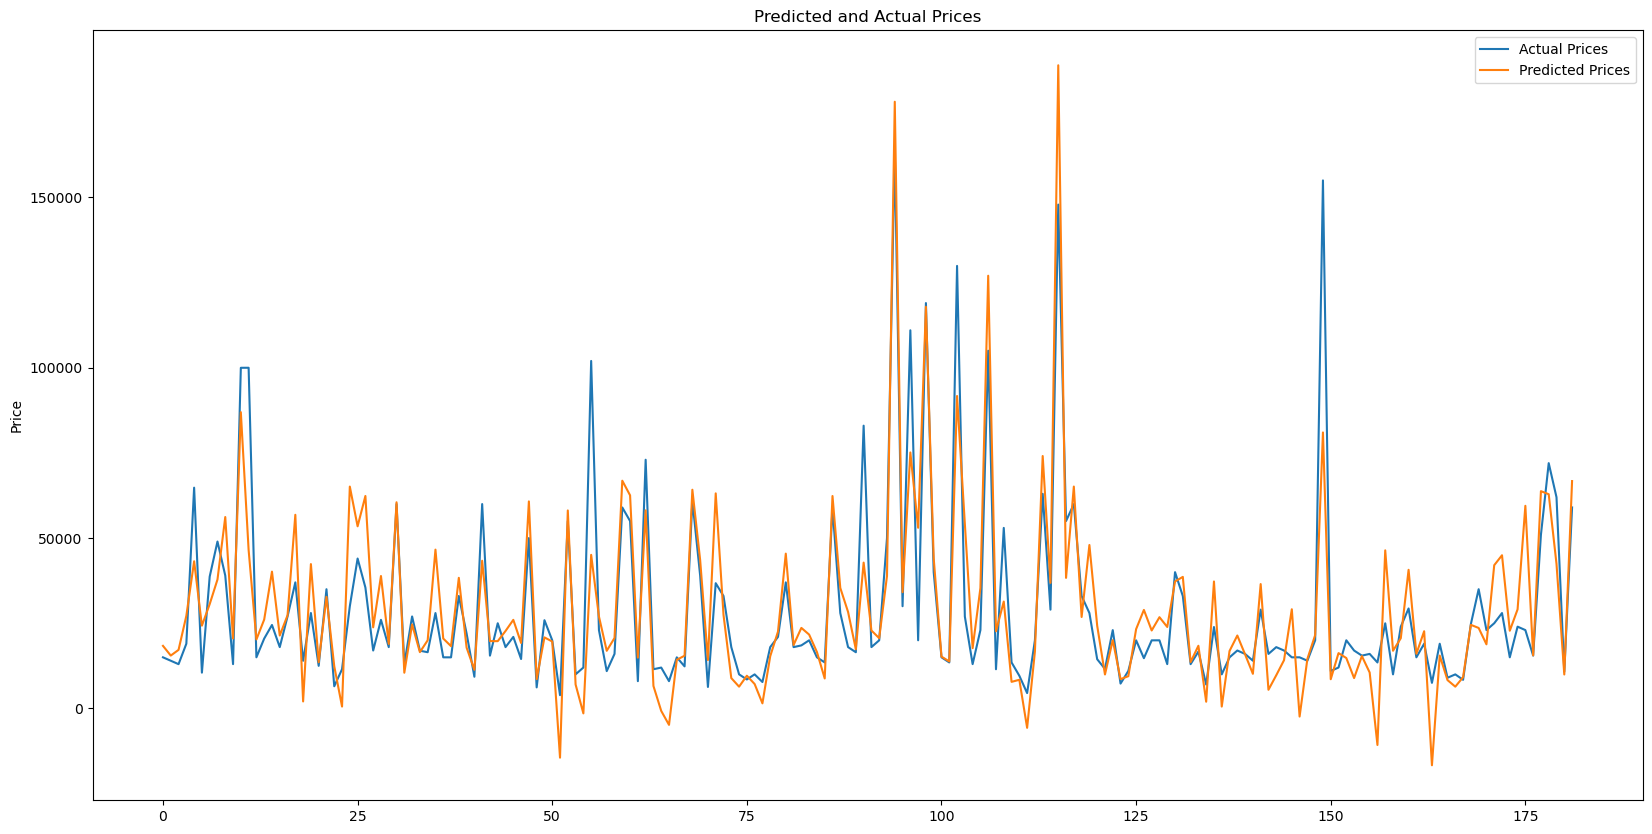

In [22]:
#Plotting predicted prices and actual prices
plt.figure(figsize=(20, 10))
plt.plot(linear_predict_df)
plt.ylabel('Price')
plt.title('Predicted and Actual Prices')
plt.legend(['Actual Prices', 'Predicted Prices'])

In [23]:
#Developing logistic regression model
logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [24]:
logistic_predictions = logistic_model.predict(X_test)

In [25]:
logistic_predict_df = pd.DataFrame(columns=['test_data', 'predictions'])
logistic_predict_df['test_data'] = y_test
logistic_predict_df['predictions'] = logistic_predictions
logistic_predict_df

,test_data,predictions
307,14999,13999
961,13990,18999
482,12990,11999
691,18990,19990
337,64800,29990
...,...,...
364,50999,39999
202,71999,39999
532,61990,39999
530,10799,13999


In [26]:
#Root mean squared error
rmse = mean_squared_error(y_test, logistic_predictions, squared=False)
rmse

16248.787948204454

In [27]:
#Mean absolute error
mae = mean_absolute_error(y_test, logistic_predictions)
mae

8672.456043956045

In [28]:
logistic_predict_df = logistic_predict_df.reset_index()
logistic_predict_df = logistic_predict_df.drop(columns=['index'])

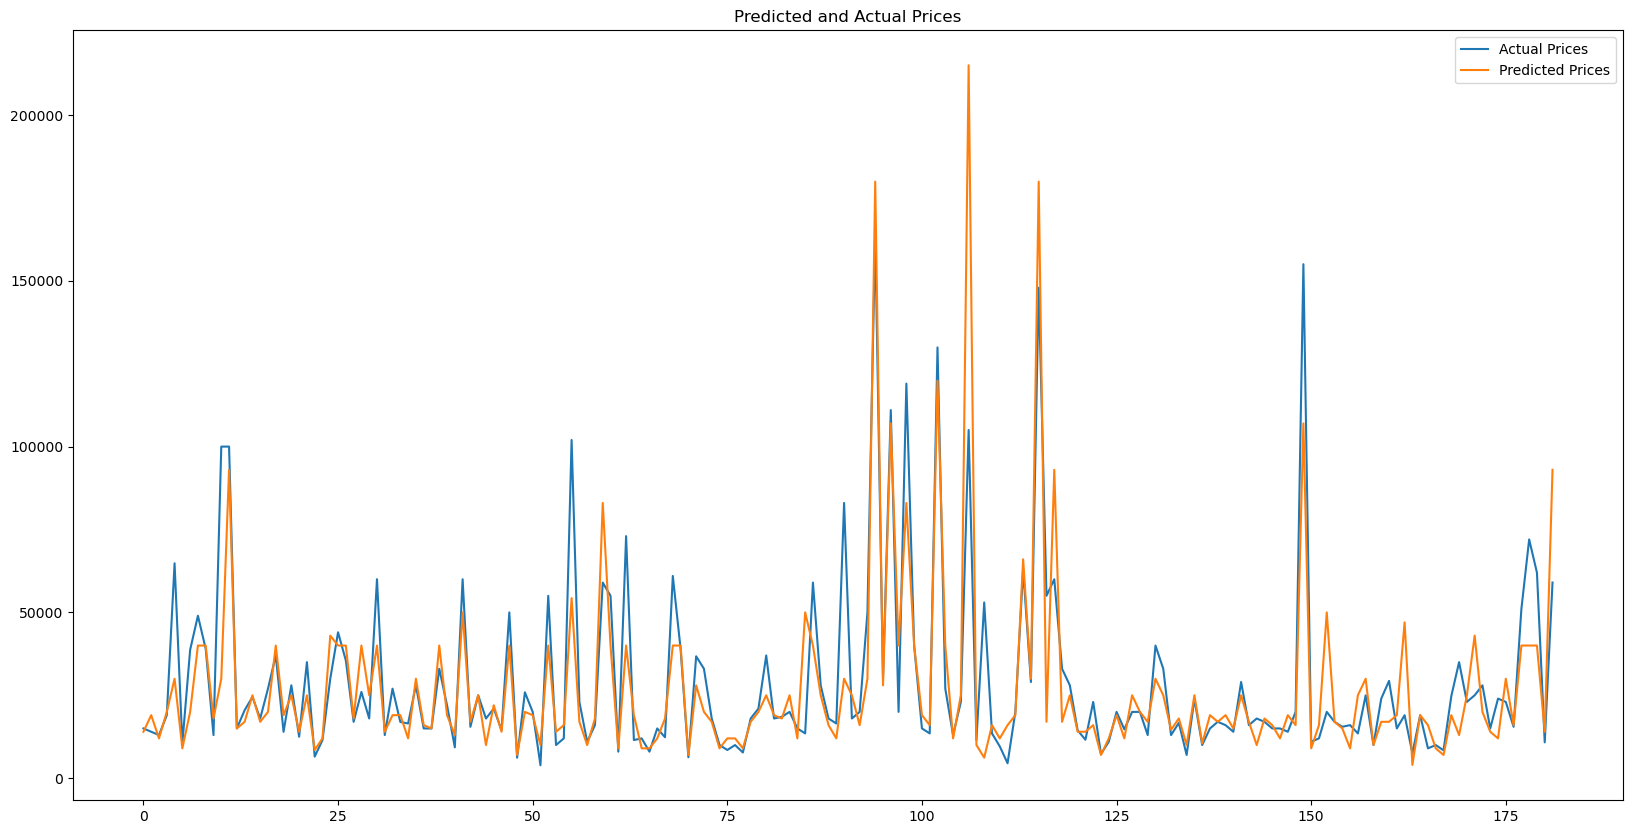

In [29]:
#Plotting predicted prices and actual prices
plt.figure(figsize=(20, 10))
plt.plot(logistic_predict_df)
plt.title('Predicted and Actual Prices')
plt.legend(['Actual Prices', 'Predicted Prices'])

In [30]:
#Finding the best max_depth
max_depth = []
rmse_list = []
mae_list = []
for i in range(2, 41):
    max_depth.append(i)
    randomforest_model = RandomForestRegressor(max_depth=i)
    randomforest_model.fit(X_train, y_train)
    randomforest_predictions = randomforest_model.predict(X_test)
    rmse = mean_squared_error(y_test, randomforest_predictions, squared=False)
    rmse_list.append(rmse)

for i in range(2, 41):
    randomforest_model = RandomForestRegressor(max_depth=i)
    randomforest_model.fit(X_train, y_train)
    randomforest_predictions = randomforest_model.predict(X_test)
    mae = mean_absolute_error(y_test, randomforest_predictions)
    mae_list.append(mae)

randomforest_accuracy_df = pd.DataFrame(columns=['max_depth', 'rmse', 'mae'])
randomforest_accuracy_df['max_depth'] = max_depth
randomforest_accuracy_df['rmse'] = rmse_list
randomforest_accuracy_df['mae'] = mae_list

In [31]:
randomforest_accuracy_df.head(15)

,max_depth,rmse,mae
0,2,15827.336126,9050.644786
1,3,13773.788543,7762.588691
2,4,12228.147581,7066.368036
3,5,11304.953414,6462.687248
4,6,11022.523096,5935.655055
5,7,10674.505279,5952.459464
6,8,10286.640461,5776.490263
7,9,10310.069456,5705.537653
8,10,10321.439675,5550.560284
9,11,10328.818295,5792.859328


Text(0.5, 1.0, 'Model Accuracy at Each Value for max_depth')

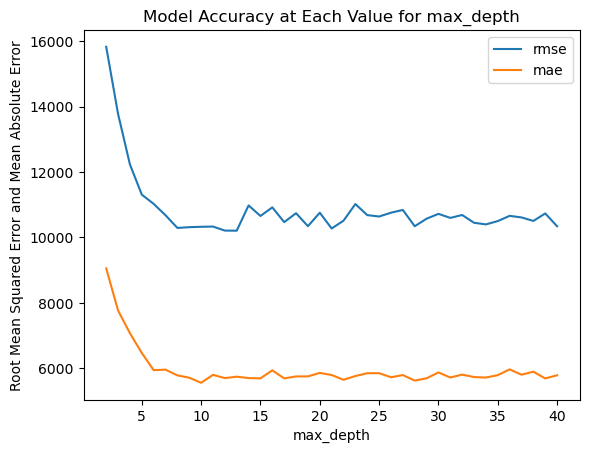

In [32]:
#Plotting root mean squared error and mean absolute error to show accuracy when max_depth it set to different values
randomforest_accuracy_df.plot(x='max_depth', y=['rmse', 'mae'])
plt.ylabel('Root Mean Squared Error and Mean Absolute Error')
plt.title('Model Accuracy at Each Value for max_depth')

In [33]:
#Developing random forest regression model
randomforest_model = RandomForestRegressor(max_depth=11)
randomforest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=11)

In [34]:
randomforest_predictions = randomforest_model.predict(X_test)

In [35]:
randomforest_predict_df = pd.DataFrame(columns=['test_data', 'predictions'])
randomforest_predict_df['test_data'] = y_test
randomforest_predict_df['predictions'] = randomforest_predictions
randomforest_predict_df.head()

,test_data,predictions
307,14999,14120.377624
961,13990,16390.857236
482,12990,15086.992106
691,18990,22293.830976
337,64800,56189.505447


In [36]:
randomforest_predict_df = randomforest_predict_df.reset_index()
randomforest_predict_df = randomforest_predict_df.drop(columns=['index'])

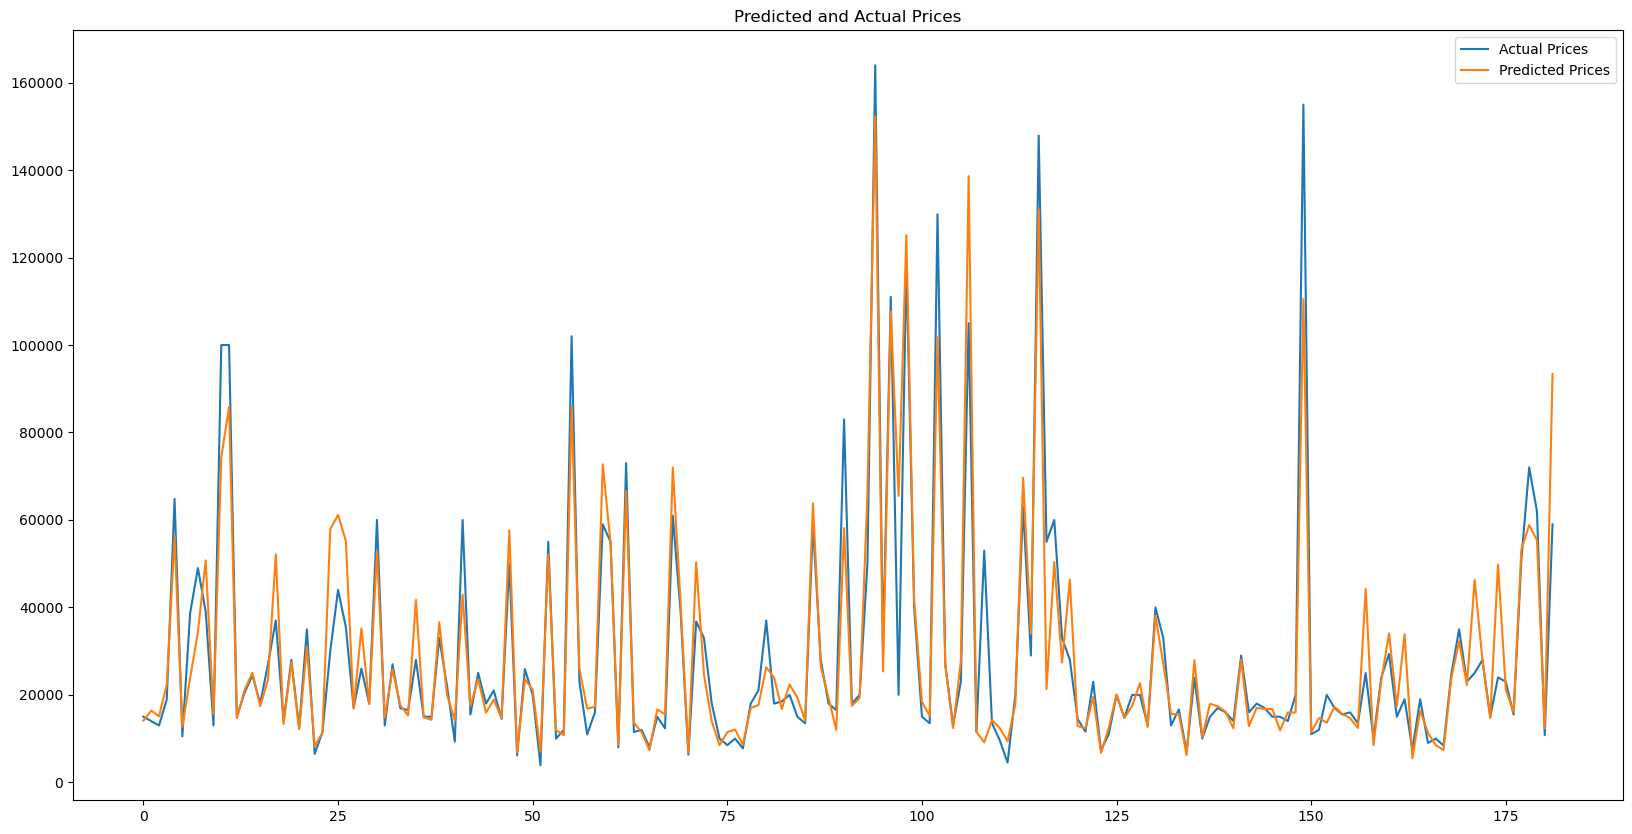

In [37]:
#Plotting predicted prices and actual prices
plt.figure(figsize=(20, 10))
plt.plot(randomforest_predict_df)
plt.title('Predicted and Actual Prices')
plt.legend(['Actual Prices', 'Predicted Prices'])